# Exponential Thick Disc

Density profile : 


\begin{equation}
\label{eq:df_disc}
\rho(R, z) = \rho_{d, 0} \rho_R (R) \rho_z (z)
\end{equation}

where 

$$ \rho_R (R) = e^{\alpha R}$$

and $$ \rho_z (z) = \cosh^{-2}{\left(\frac{\beta z}{2} \right)}$$

Result is : 

\begin{equation}
\label{eq:sol_disc}
\Phi(R, z) = - 2\pi G \alpha \rho_{d, 0} \int_{0}^{\infty} dk J_0 (kR) \dfrac{I_z (k)}{(\alpha^2 + k^2)^{\frac{3}{2}}}
\end{equation}

where 
$$
\begin{equation}
\label{eq:integral}
I_z(k) = \dfrac{4}{\beta} \left\{ 1 - \dfrac{k}{k+\beta} \left[ e^{-z\beta} {}_2F_1\left(1, 1 + \frac{k}{\beta}; 2 + \frac{k}{\beta}; -e^{-z\beta} \right) + e^{z\beta} {}_2F_1\left(1, 1 + \frac{k}{\beta}; 2 + \frac{k}{\beta}; -e^{z\beta} \right)\right] \right\}
\end{equation}
$$

where $_2F_1$ is the Gaussian hypergeometric function, such that :

$$ _2F_1(a, b, c; z) = \sum_{n=0}^{\infty} \frac{(a)_n (b)_n}{(c)_n}\cdot \dfrac{z^n}{n!}$$ 

where $(a)_n$ is the Pochhammer symbol and $|z| < 1$.

This special function is implemented in scipy : https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.hyp2f1.html

**Note:**

I try here to simplify the Poisson equation the real space :
 
$$ \nabla^2 \Phi (R, z) = 4\pi G \rho_0 e^{\frac{-R}{R_d}} \cosh^2{\frac{z}{z_d}}$$

which in cylindrical coordinates, with independence on the $\theta$ component reduces to:

$$ \dfrac{1}{R} \dfrac{\partial}{\partial R} \left( R \dfrac{\partial \Phi}{\partial R}\right) + \dfrac{\partial^2 \Phi}{\partial z^2} = 4\pi G \rho_0 e^{\frac{-R}{R_d}} \cosh^2{\frac{z}{z_d}}$$

setting $z' = \dfrac{z}{z_d}$ and $R' = \dfrac{R}{R_d}$ , we can write simplify the equation in the following form :

$$ \dfrac{1}{R_{d}^{2}} \dfrac{1}{R'} \dfrac{\partial}{\partial R'} \left(R' \dfrac{\partial \Phi}{\partial R'}\right) + \dfrac{1}{z_{d}^{2}}\dfrac{\partial^2 \Phi}{\partial z'^2} = 4\pi G \rho_0 e^{-R'} \cosh^2{z'}$$

We can therefore try to solve for the potential using `scipy.integrate.quad` function. We need to give it the right hand side of the potential expression, as well as the boundaries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as itg
from scipy.special import hyp2f1, jv

In [2]:
def Iz(z, k, b):
    factor = k / (k + b)
    first_part = np.exp(-z * b) * hyp2f1(1, 1 + k / b, 2 + k / b, -np.exp(-z * b))
    second_part = np.exp(z * b) * hyp2f1(1, 1 + k / b, 2 + k / b, -np.exp(z * b))
    
    return (4 / b) + (1 - factor * (first_part + second_part))

In [3]:
def potential_integral(k, R, z, alpha, beta):
    return jv(0, R) * Iz(z, k, b=beta) / (alpha**2 + k**2)**1.5

**Proper values have to be set for the following parameters :**

In [4]:
R_scalar = 1
z_scalar = 0.5
Rd = 2
zd = 0.3
alpha = 1 / Rd
beta = 2 / zd

We can only compute for aparticular value of $(R, z)$ with the `quad`function :

In [5]:
scalar_sol = itg.quad(func=potential_integral, a=0, b=np.inf, args=(R_scalar, z_scalar, alpha, beta))

In [6]:
scalar_sol

(4.34982108956373, 6.279792457417721e-08)

We can integrate over a domain $R \times z$ using the `quad_vec` function : 

In [7]:
Rtab = np.linspace(1e-2, 10, 100)
ztab = np.linspace(1e-2, 0.1, 100)

Rv, zv = np.meshgrid(Rtab, ztab)

In [8]:
vec_sol = itg.quad_vec(potential_integral, a=0, b=np.inf, args=(Rv, zv, alpha, beta))

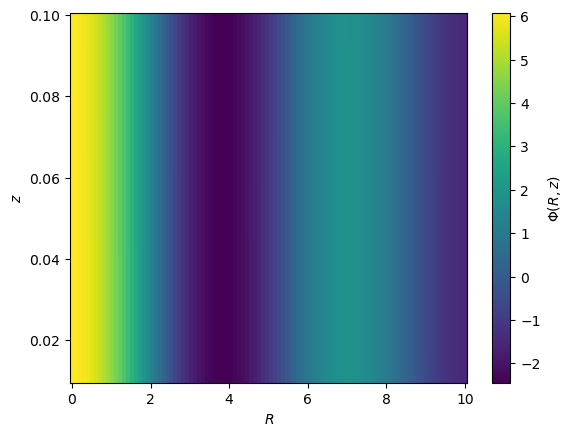

In [9]:
plt.figure()
plt.pcolormesh(Rv, zv, vec_sol[0])
plt.xlabel("$R$")
plt.ylabel("$z$")
plt.colorbar(label="$\Phi(R, z)$");

Or alternatively we can set $R$ to a scalar value, and let $z$ be the only variable : *(I am not sure what is the way the proceed)*

In [10]:
vec_sol = itg.quad_vec(potential_integral, a=0, b=np.inf, args=(R_scalar, ztab, alpha, beta))

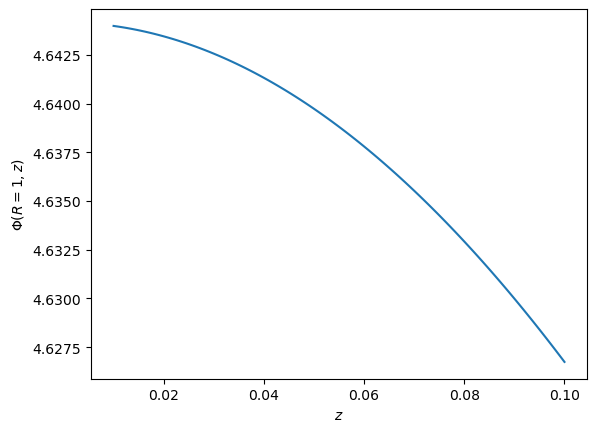

In [11]:
plt.figure()
plt.plot(ztab, vec_sol[0])
plt.xlabel("$z$")
plt.ylabel(f"$\Phi(R={R_scalar}, z)$");